# Magic Dataset Visualisation Project from Free Code Camp ORG


### Importing the necessary libraries


In [2]:
%pip install --quiet --upgrade \
  pip \
  pandas \
  numpy \
  matplotlib \
  seaborn \
  scikit-learn \
  imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Leading the dataset to the _panda_ dataframe

---

#### Dataset

- [URL](https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope)
- It is a open source, copy right free dataset which was actually the data of a **Gamma Telescope**, which captured the effects of gamma rays from the space via camera


In [4]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('data/magic.csv', names=cols)
df.head(5)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


Transforming the **Class** column so that if the class is == g then it will be represented as 1 otherwise 0, because our computer is good at remembering numbrs than characters


In [5]:
df["class"] = (df["class"] == "g").astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


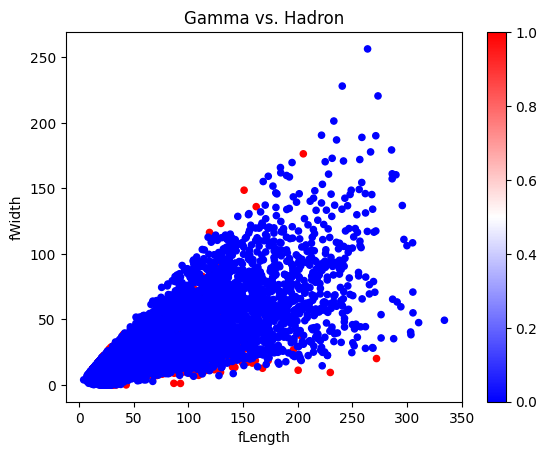

In [6]:
df.plot.scatter(x="fLength", y="fWidth", c=df["class"], cmap="bwr")
plt.title("Gamma vs. Hadron")
plt.xlabel("fLength")
plt.ylabel("fWidth")
plt.show()

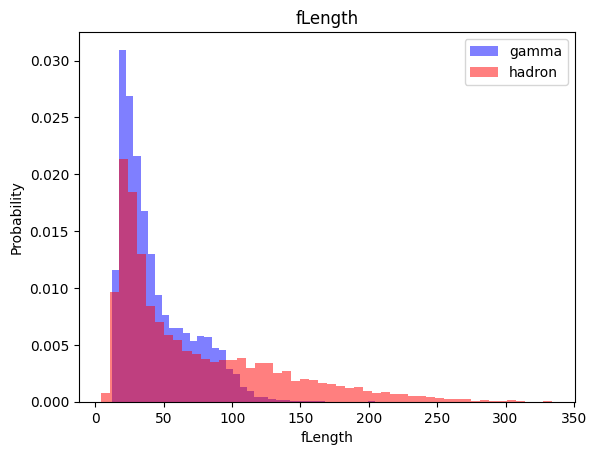

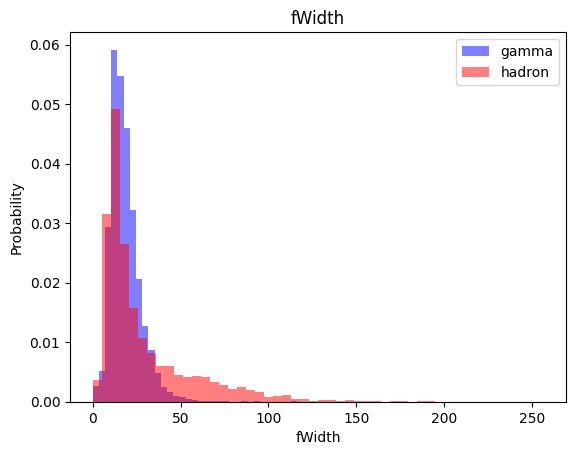

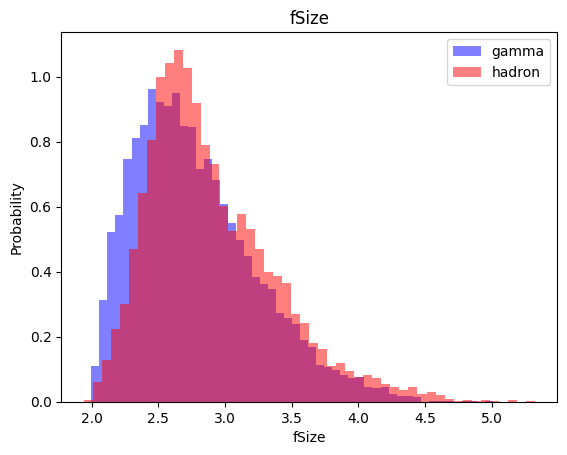

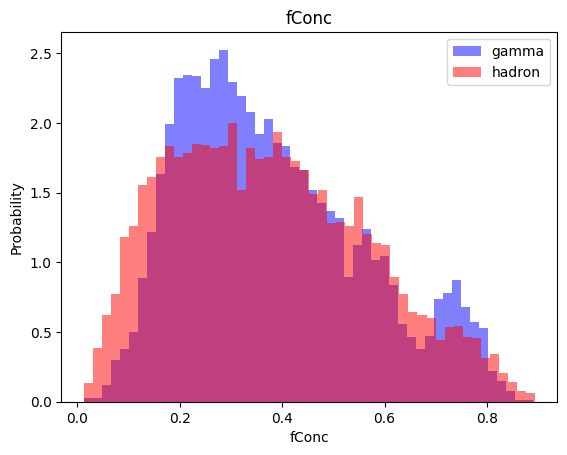

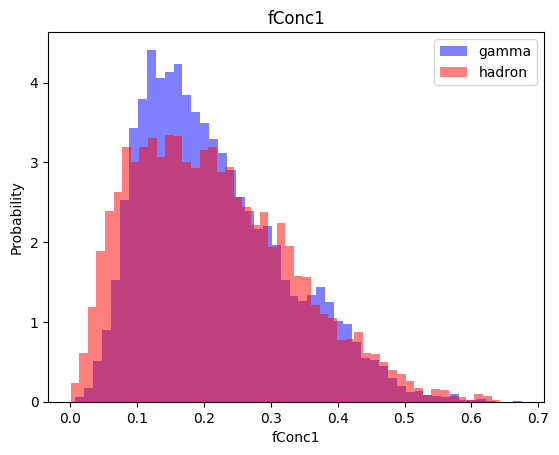

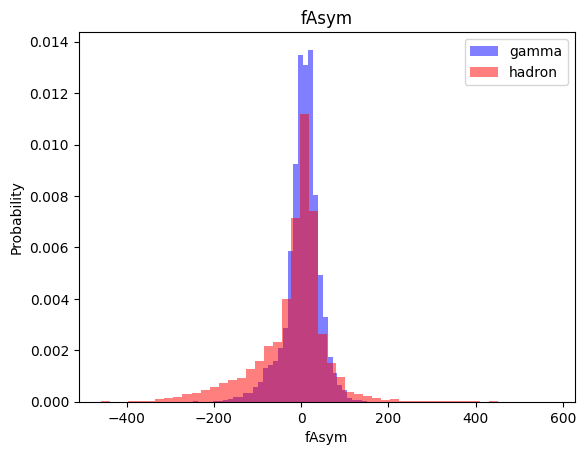

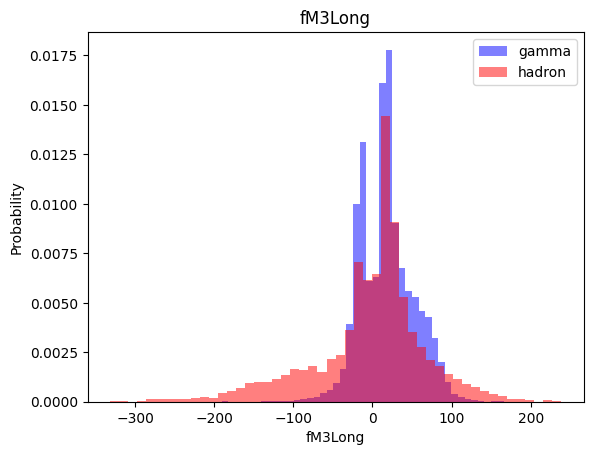

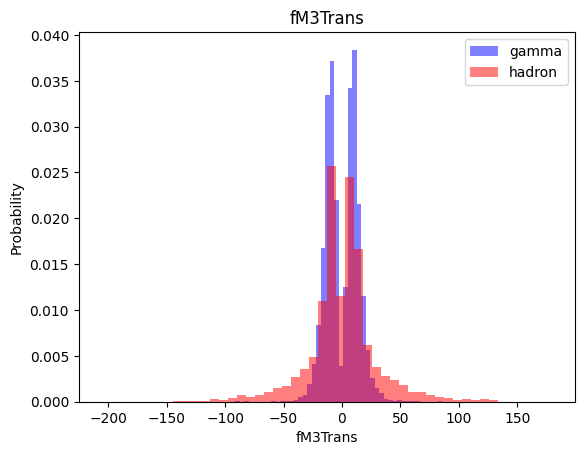

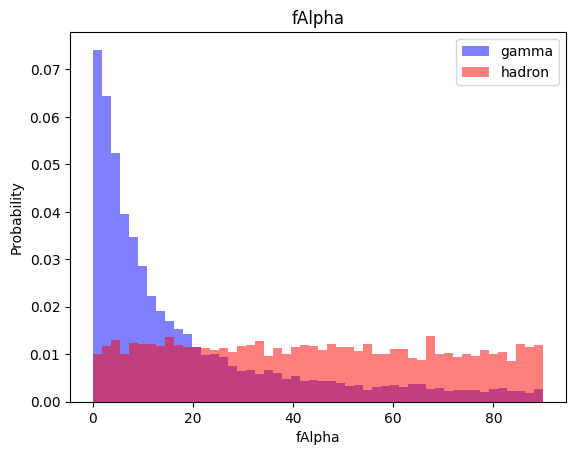

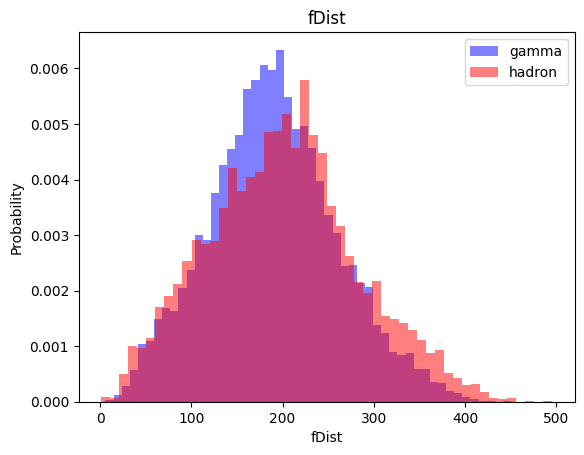

In [7]:
for l in cols[:-1]:
    plt.hist(df[df["class"] == 1][l], color="blue", label="gamma", alpha=0.5, density=True, bins=50)
    plt.hist(df[df["class"] == 0][l], color="red", label="hadron", alpha=0.5, density=True, bins=50)
    plt.legend()
    plt.title(l)
    plt.xlabel(l)
    plt.ylabel("Probability")
    plt.show()

In [8]:
train, validation, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])

/home/piush/Prog/ml/magic-dataset-fcc/venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [9]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    Y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()

    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        ros.fit_resample(X, Y)

    data = np.hstack((X, np.reshape(Y, (-1, 1))))

    return data, X, Y

In [10]:
train, X_Train, Y_Train = scale_dataset(train, oversample=True)
valid, X_Valid, Y_Valid = scale_dataset(validation, oversample=False)
test, X_Test, Y_Test = scale_dataset(test, oversample=False)

### K-NN Implementation


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knnModel = KNeighborsClassifier(n_neighbors=5)

knnModel.fit(X_Train, Y_Train)
Y_Pred = knnModel.predict(X_Test)

from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(Y_Test, Y_Pred)
print("Confusion Matrix")
print(cm)
print(classification_report(Y_Test, y_pred=Y_Pred, target_names=["Hadron", "Gamma"]))

Confusion Matrix
[[ 809  476]
 [ 157 2362]]
              precision    recall  f1-score   support

      Hadron       0.84      0.63      0.72      1285
       Gamma       0.83      0.94      0.88      2519

    accuracy                           0.83      3804
   macro avg       0.83      0.78      0.80      3804
weighted avg       0.83      0.83      0.83      3804



In [48]:
Y_Pred

array([1, 1, 1, ..., 1, 1, 0], shape=(3804,))

In [23]:
Y_Test

array([1, 1, 1, ..., 1, 1, 0], shape=(3804,))